<a href="https://colab.research.google.com/github/rym-sanaa/projects-/blob/main/Preparatory_project_unit_CLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1st** **lets** **start** **by** **installing** **pysqlite** 


In [ ]:
pip install pysqlite3 


Importing the needed packages


In [ ]:
import sqlite3
import numpy as np
from matplotlib import pyplot
from scipy.optimize import curve_fit



In [ ]:
#create a connection with the database 
conn = sqlite3.connect('/content/longley.db')


In [ ]:
#create a curser so I can manipulate the dat in the db
curser= conn.cursor()

In [ ]:
#excute the sql query that will allow me to read all the columns/rows in the longley dataset
curser.execute('SELECT * from longley')

In [ ]:
results = curser.fetchall()

In [ ]:
print(results)

[('83', '234.289', '235.6', '159', '107.608', '1947', '60.323'), ('88.5', '259.426', '232.5', '145.6', '108.632', '1948', '61.122'), ('88.2', '258.054', '368.2', '161.6', '109.773', '1949', '60.171'), ('89.5', '284.599', '335.1', '165', '110.929', '1950', '61.187'), ('96.2', '328.975', '209.9', '309.9', '112.075', '1951', '63.221'), ('98.1', '346.999', '193.2', '359.4', '113.27', '1952', '63.639'), ('99', '365.385', '187', '354.7', '115.094', '1953', '64.989'), ('100', '363.112', '357.8', '335', '116.219', '1954', '63.761'), ('101.2', '397.469', '290.4', '304.8', '117.388', '1955', '66.019'), ('104.6', '419.18', '282.2', '285.7', '118.734', '1956', '67.857'), ('108.4', '442.769', '293.6', '279.8', '120.445', '1957', '68.169'), ('110.8', '444.546', '468.1', '263.7', '121.95', '1958', '66.513'), ('112.6', '482.704', '381.3', '255.2', '123.366', '1959', '68.655'), ('114.2', '502.601', '393.1', '251.4', '125.368', '1960', '69.564'), ('115.7', '518.173', '480.6', '257.2', '127.852', '1961',

In [ ]:
def convert_to_floats(rows):
    """convert a list of string tuples to a  ndarray of floats"""

    # create a a result list ( later to be converted to np array matrix)
    result = []
    # loop through the list and convert row by row
    for x in rows:
      value = np.asarray(x)
      value = value.astype(np.float)
      result.append(value)  

    return np.array(result)

In [ ]:
data= convert_to_floats(results)

In [ ]:
data

array([[  83.   ,  234.289,  235.6  ,  159.   ,  107.608, 1947.   ,
          60.323],
       [  88.5  ,  259.426,  232.5  ,  145.6  ,  108.632, 1948.   ,
          61.122],
       [  88.2  ,  258.054,  368.2  ,  161.6  ,  109.773, 1949.   ,
          60.171],
       [  89.5  ,  284.599,  335.1  ,  165.   ,  110.929, 1950.   ,
          61.187],
       [  96.2  ,  328.975,  209.9  ,  309.9  ,  112.075, 1951.   ,
          63.221],
       [  98.1  ,  346.999,  193.2  ,  359.4  ,  113.27 , 1952.   ,
          63.639],
       [  99.   ,  365.385,  187.   ,  354.7  ,  115.094, 1953.   ,
          64.989],
       [ 100.   ,  363.112,  357.8  ,  335.   ,  116.219, 1954.   ,
          63.761],
       [ 101.2  ,  397.469,  290.4  ,  304.8  ,  117.388, 1955.   ,
          66.019],
       [ 104.6  ,  419.18 ,  282.2  ,  285.7  ,  118.734, 1956.   ,
          67.857],
       [ 108.4  ,  442.769,  293.6  ,  279.8  ,  120.445, 1957.   ,
          68.169],
       [ 110.8  ,  444.546,  468.1  ,  263.

In [ ]:
data.shape

(16, 7)

In [ ]:
x, y =  data[:,5],data[:, 0]


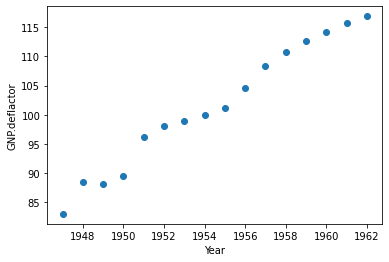

In [ ]:
pyplot.scatter(x, y)
pyplot.xlabel("Year")
pyplot.ylabel("GNP.deflactor")
pyplot.show()

In [ ]:
from scipy.optimize import curve_fit


def set_objective(x, b, a):
    """ This is the function I want to fit to my data """
    return b + a*x

def get_result( x, y):
    """Return optimal values for a and b for the equation y = a*x+b """

    # curve fit
    estimations, _= curve_fit(set_objective, x, y)
    # summarize the parameter values
    a, b = estimations
    print('y = %.5f * x + %.5f' % (a, b))
    return a,b 

In [ ]:
a,b=get_result(x,y)

y = -4289.33284 * x + 2.24662


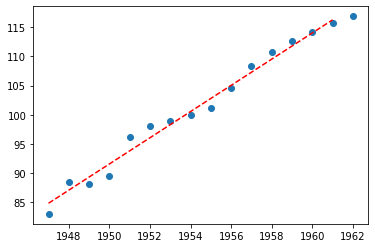

In [ ]:
# plotting the result 
from numpy import arange

pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = set_objective(x_line, a, b)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()